<a href="https://colab.research.google.com/github/shintaroudlotulhanafia/TugasAkhirS1-SingleStock/blob/main/1MultipleTimesRunning/1.3.TA_S1_Shinta_DRLforSingleStockTrading_AAPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.3. Trading AAPL Stock**

This notebook is used for exploring what is happen when the same set of notebook running for multiple times for the second time (after clicking disconnect and delete runtime) to know what will happen.

#Deep Reinforcement Learning for Stock Trading from Scratch: Single Stock Trading

Python Package Installation
As a first step we check if the additional packages needed are present, if not install them.

* Yahoo Finance API
* pandas
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow

In [65]:
import pkg_resources
import pip
installedPackages = {pkg.key for pkg in pkg_resources.working_set}
required = {'yfinance', 'pandas', 'matplotlib', 'stockstats','stable-baselines','gym','tensorflow'}
missing = required - installedPackages
if missing:
    !pip install yfinance
    !pip install pandas
    !pip install matplotlib
    !pip install stockstats
    !pip install gym
    !pip install stable-baselines[mpi]
    !pip install tensorflow==1.15.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import packages

In [66]:
import yfinance as yf
from stockstats import StockDataFrame as Sdf

import pandas as pd
import matplotlib.pyplot as plt

import gym
from stable_baselines import PPO2, DDPG, A2C, ACKTR, TD3
from stable_baselines import DDPG
from stable_baselines import A2C
from stable_baselines import SAC
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.common.policies import MlpPolicy

In [67]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

#Part 1: Download Data
Yahoo Finance is a website that provides stock data, financial news, financial reports, etc. All the data provided by Yahoo Finance is free.

In [68]:
# Download and save the data in a pandas DataFrame:
data_df = yf.download("AAPL", start="2009-01-01", end="2020-09-23")

[*********************100%***********************]  1 of 1 completed


In [69]:
data_df.shape

(2951, 6)

In [70]:
# reset the index, we want to use numbers instead of dates
data_df=data_df.reset_index()

In [71]:
data_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,3.067143,3.251429,3.041429,3.241071,2.767330,746015200
1,2009-01-05,3.327500,3.435000,3.311071,3.377857,2.884123,1181608400
2,2009-01-06,3.426786,3.470357,3.299643,3.322143,2.836551,1289310400
3,2009-01-07,3.278929,3.303571,3.223571,3.250357,2.775259,753048800
4,2009-01-08,3.229643,3.326786,3.215714,3.310714,2.826793,673500800


In [72]:
data_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [73]:
# convert the column names to standardized names
data_df.columns = ['datadate','open','high','low','close','adjcp','volume']

In [74]:
# save the data to a csv file in your current folder
#data_df.to_csv('TLKM_2009_2020.csv')

#Part 2: Preprocess Data
Data preprocessing is a crucial step for training a high quality machine learning model. We need to check for missing data and do feature engineering in order to convert the data into a model-ready state.

In [75]:
# check missing data 
data_df.isnull().values.any()

False

In [76]:
# calculate technical indicators like MACD
stock = Sdf.retype(data_df.copy())
# we need to use adjusted close price instead of close price
stock['close'] = stock['adjcp']
data_df['macd'] = stock['macd']

In [77]:
# check missing data again
data_df.isnull().values.any()

False

In [78]:
data_df.head()

,datadate,open,high,low,close,adjcp,volume,macd
0,2009-01-02,3.067143,3.251429,3.041429,3.241071,2.767330,746015200,0.000000
1,2009-01-05,3.327500,3.435000,3.311071,3.377857,2.884123,1181608400,0.002620
2,2009-01-06,3.426786,3.470357,3.299643,3.322143,2.836551,1289310400,0.001864
3,2009-01-07,3.278929,3.303571,3.223571,3.250357,2.775259,753048800,-0.000739
4,2009-01-08,3.229643,3.326786,3.215714,3.310714,2.826793,673500800,-0.000087


In [79]:
#data_df=data_df.fillna(method='bfill')

In [80]:
# Note that I always use a copy of the original data to try it track step by step.
data_clean = data_df.copy()

In [81]:
data_clean.head()

,datadate,open,high,low,close,adjcp,volume,macd
0,2009-01-02,3.067143,3.251429,3.041429,3.241071,2.767330,746015200,0.000000
1,2009-01-05,3.327500,3.435000,3.311071,3.377857,2.884123,1181608400,0.002620
2,2009-01-06,3.426786,3.470357,3.299643,3.322143,2.836551,1289310400,0.001864
3,2009-01-07,3.278929,3.303571,3.223571,3.250357,2.775259,753048800,-0.000739
4,2009-01-08,3.229643,3.326786,3.215714,3.310714,2.826793,673500800,-0.000087


In [82]:
data_clean.tail()

,datadate,open,high,low,close,adjcp,volume,macd
2946,2020-09-16,115.230003,116.000000,112.040001,112.129997,110.792580,154679000,0.711012
2947,2020-09-17,109.720001,112.199997,108.709999,110.339996,109.023918,178011000,0.129465
2948,2020-09-18,110.400002,110.879997,106.089996,106.839996,105.565666,287104900,-0.603510
2949,2020-09-21,104.540001,110.190002,103.099998,110.080002,108.767036,195713800,-0.915521
2950,2020-09-22,112.680000,112.860001,109.160004,111.809998,110.476387,183055400,-1.013182


#Part 3: Design Environment
Considering the stochastic and interactive nature of the automated stock trading tasks, a financial task is modeled as a Markov Decision Process (MDP) problem. The training process involves observing stock price change, taking an action and reward's calculation to have the agent adjusting its strategy accordingly. By interacting with the environment, the trading agent will derive a trading strategy with the maximized rewards as time proceeds.

Our trading environments, based on OpenAI Gym framework, simulate live stock markets with real market data according to the principle of time-driven simulation.

The action space describes the allowed actions that the agent interacts with the environment. Normally, action a includes three actions: {-1, 0, 1}, where -1, 0, 1 represent selling, holding, and buying one share. Also, an action can be carried upon multiple shares. We use an action space {-k,…,-1, 0, 1, …, k}, where k denotes the number of shares to buy and -k denotes the number of shares to sell. For example, "Buy 10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or -10, respectively. The continuous action space needs to be normalized to [-1, 1], since the policy is defined on a Gaussian distribution, which needs to be normalized and symmetric.

In [83]:
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

# Global variables
HMAX_NORMALIZE = 200
INITIAL_ACCOUNT_BALANCE=100000
STOCK_DIM = 1

# transaction fee: 1/1000 reasonable percentage
TRANSACTION_FEE_PERCENT = 0.001
# REWARD_SCALING = 1e-3


class SingleStockEnv(gym.Env):
    """A stock trading environment for OpenAI gym"""
    metadata = {'render.modes': ['human']}

    def __init__(self, df,day = 0):
        #super(StockEnv, self).__init__()
        # date increment
        self.day = day
        self.df = df
        # action_space normalization and the shape is STOCK_DIM
        self.action_space = spaces.Box(low = -1, high = 1,shape = (STOCK_DIM,)) 
        # Shape = 4: [Current Balance]+[prices]+[owned shares] +[macd] 
        self.observation_space = spaces.Box(low=0, high=np.inf, shape = (4,))
        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        # termination
        self.terminal = False  
        # save the total number of trades
        self.trades = 0
        # initalize state
        self.state = [INITIAL_ACCOUNT_BALANCE] + \
                      [self.data.adjcp] + \
                      [0]*STOCK_DIM + \
                      [self.data.macd] 
        # initialize reward and cost
        self.reward = 0
        self.cost = 0
        
        # memorize the total value, total rewards
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.rewards_memory = []

    def _sell_stock(self, index, action):
        # perform sell action based on the sign of the action
        if self.state[index+STOCK_DIM+1] > 0:
            # update balance
            self.state[0] += \
            self.state[index+1]*min(abs(action),self.state[index+STOCK_DIM+1]) * \
             (1- TRANSACTION_FEE_PERCENT)
            # update held shares
            self.state[index+STOCK_DIM+1] -= min(abs(action), self.state[index+STOCK_DIM+1])
            # update transaction costs
            self.cost +=self.state[index+1]*min(abs(action),self.state[index+STOCK_DIM+1]) * \
             TRANSACTION_FEE_PERCENT
            self.trades+=1
        else:
            pass
            
    def _buy_stock(self, index, action):
        # perform buy action based on the sign of the action
        available_amount = self.state[0] // self.state[index+1]
        #update balance
        self.state[0] -= self.state[index+1]*min(available_amount, action)* \
                          (1+ TRANSACTION_FEE_PERCENT)
        # update held shares
        self.state[index+STOCK_DIM+1] += min(available_amount, action)
        # update transaction costs
        self.cost+=self.state[index+1]*min(available_amount, action)* \
                          TRANSACTION_FEE_PERCENT
        self.trades+=1
        
    def step(self, actions):
        self.terminal = self.day >= len(self.df.index.unique())-1

        if self.terminal:
            plt.plot(self.asset_memory,'r')
            plt.savefig('account_value.png')
            plt.close()
            
            end_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            print("previous_total_asset:{}".format(self.asset_memory[0])) 
            print("end_total_asset:{}".format(end_total_asset))
            
            df_total_value = pd.DataFrame(self.asset_memory)
            df_total_value.to_csv('account_value.csv')
            print("total_reward:{}".format(self.state[0]+sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))- INITIAL_ACCOUNT_BALANCE ))
            print("total_cost: ", self.cost)
            print("total trades: ", self.trades)
            
            df_total_value.columns = ['account_value']
            df_total_value['daily_return']=df_total_value.pct_change(1)
            
            if df_total_value['daily_return'].std()!=0:
                sharpe = (252**0.5)*df_total_value['daily_return'].mean()/ \
                      df_total_value['daily_return'].std()
                print("Sharpe: ",sharpe)
            df_rewards = pd.DataFrame(self.rewards_memory)
            df_rewards.to_csv('account_rewards.csv')
            return self.state, self.reward, self.terminal,{}

        else:
            
            # actions are the shares we need to buy, hold, or sell
            actions = actions * HMAX_NORMALIZE
            # calculate begining total asset
            begin_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            
            # perform buy or sell action
            argsort_actions = np.argsort(actions)
            sell_index = argsort_actions[:np.where(actions < 0)[0].shape[0]]
            buy_index = argsort_actions[::-1][:np.where(actions > 0)[0].shape[0]]

            for index in sell_index:
                # print('take sell action'.format(actions[index]))
                self._sell_stock(index, actions[index])

            for index in buy_index:
                # print('take buy action: {}'.format(actions[index]))
                self._buy_stock(index, actions[index])
            
            # update data, walk a step s'
            self.day += 1
            self.data = self.df.loc[self.day,:]         
            #load next state
            self.state =  [self.state[0]] + \
                          [self.data.adjcp] + \
                          list(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]) +\
                          [self.data.macd]
                        
            # calculate the end total asset
            end_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            self.reward = end_total_asset - begin_total_asset  
            self.rewards_memory.append(self.reward)
            #self.reward = self.reward * REWARD_SCALING
            self.asset_memory.append(end_total_asset)

        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        self.cost = 0
        self.trades = 0
        self.terminal = False 
        self.rewards_memory = []
        #initiate state
        self.state = [INITIAL_ACCOUNT_BALANCE] + \
                      [self.data.adjcp] + \
                      [0]*STOCK_DIM + \
                      [self.data.macd]
        return self.state
    
    def render(self, mode='human'):
        return self.state

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

#Part 4: Implement DRL Algorithms
The implementation of the DRL algorithms are based on OpenAI Baselines and Stable Baselines. Stable Baselines is a fork of OpenAI Baselines, with a major structural refactoring, and code cleanups.

###**Training data: 2009-01-01 to 2018-12-31**

In [84]:
train = data_clean[(data_clean.datadate>='2009-01-01') & (data_clean.datadate<'2019-01-01')]
# the index needs to start from 0
train=train.reset_index(drop=True)

In [85]:
train.head()

,datadate,open,high,low,close,adjcp,volume,macd
0,2009-01-02,3.067143,3.251429,3.041429,3.241071,2.767330,746015200,0.000000
1,2009-01-05,3.327500,3.435000,3.311071,3.377857,2.884123,1181608400,0.002620
2,2009-01-06,3.426786,3.470357,3.299643,3.322143,2.836551,1289310400,0.001864
3,2009-01-07,3.278929,3.303571,3.223571,3.250357,2.775259,753048800,-0.000739
4,2009-01-08,3.229643,3.326786,3.215714,3.310714,2.826793,673500800,-0.000087


#**Model Training: PPO**

In [86]:
#tensorboard --logdir ./single_stock_tensorboard/
env_train = DummyVecEnv([lambda: SingleStockEnv(train)])
model_ppo = PPO2('MlpPolicy', env_train, tensorboard_log="./single_stock_trading_2_tensorboard/")
model_ppo.learn(total_timesteps=100000, tb_log_name="run_aapl_ppo")
#model.save('AAPL_ddpg_50k')

previous_total_asset:100000
end_total_asset:266664.621841759
total_reward:166664.621841759
total_cost:  6429.733590715801
total trades:  2513
Sharpe:  0.6958329473845766
previous_total_asset:100000
end_total_asset:424489.6592186063
total_reward:324489.6592186063
total_cost:  5968.79911368952
total trades:  2511
Sharpe:  0.7654251968998177
previous_total_asset:100000
end_total_asset:647591.6546461049
total_reward:547591.6546461049
total_cost:  6077.359623714374
total trades:  2515
Sharpe:  0.9202955005882537
previous_total_asset:100000
end_total_asset:671336.0161978456
total_reward:571336.0161978456
total_cost:  6103.429528354967
total trades:  2515
Sharpe:  0.9320413752883606
previous_total_asset:100000
end_total_asset:580469.8483212624
total_reward:480469.8483212624
total_cost:  6042.419617519074
total trades:  2514
Sharpe:  0.8869970421202494
previous_total_asset:100000
end_total_asset:652340.4982111219
total_reward:552340.4982111219
total_cost:  5940.217583302718
total trades:  2512

#Testing data

In [87]:
test = data_clean[(data_clean.datadate>='2019-01-01') ]
# the index needs to start from 0
test=test.reset_index(drop=True)

In [88]:
test.head()

,datadate,open,high,low,close,adjcp,volume,macd
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168346,148158800,-1.999254
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.366497,365248800,-2.180508
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.833580,234428400,-2.180634
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.753822,219111200,-2.162245
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.435398,164101200,-2.068826


#Trading
Assume that we have 100.000 initial capital at 2019-01-01 until 2020-09-23. We use the PPO model to trade AAPL.

In [89]:
model = model_ppo
env_test = DummyVecEnv([lambda: SingleStockEnv(test)])
obs_test = env_test.reset()
print("==============Model Prediction===========")
for i in range(len(test.index.unique())):
    action, _states = model.predict(obs_test)
    obs_test, rewards, dones, info = env_test.step(action)
    env_test.render()

==============Model Prediction===========
previous_total_asset:100000
end_total_asset:294623.11308850884
total_reward:194623.11308850884
total_cost:  605.7465518760037
total trades:  434
Sharpe:  1.8880792898154213


#**Part 5: Backtest Our Strategy**
For simplicity purposes, we just calculate the Sharpe ratio and the annual return manually.

In [90]:
def get_DRL_sharpe():
    df_total_value=pd.read_csv('account_value.csv',index_col=0)
    df_total_value.columns = ['account_value']
    df_total_value['daily_return']=df_total_value.pct_change(1)
    sharpe = (252**0.5)*df_total_value['daily_return'].mean()/ \
    df_total_value['daily_return'].std()
    
    annual_return = ((df_total_value['daily_return'].mean()+1)**252-1)*100
    print("annual return: ", annual_return)
    print("sharpe ratio: ", sharpe)
    return df_total_value

In [91]:
def get_buy_and_hold_sharpe(test):
    test['daily_return']=test['adjcp'].pct_change(1)
    sharpe = (252**0.5)*test['daily_return'].mean()/ \
    test['daily_return'].std()
    annual_return = ((test['daily_return'].mean()+1)**252-1)*100
    print("annual return: ", annual_return)

    print("sharpe ratio: ", sharpe)
    #return sharpe

In [92]:
df_total_value=get_DRL_sharpe()

annual return:  100.38844700986166
sharpe ratio:  1.8880792898154204


In [93]:
get_buy_and_hold_sharpe(test)

annual return:  99.44276425229066
sharpe ratio:  1.8049079311208716


In [94]:
DRL_cumulative_return = (df_total_value.account_value.pct_change(1)+1).cumprod()-1

In [95]:
buy_and_hold_cumulative_return = (test.adjcp.pct_change(1)+1).cumprod()-1

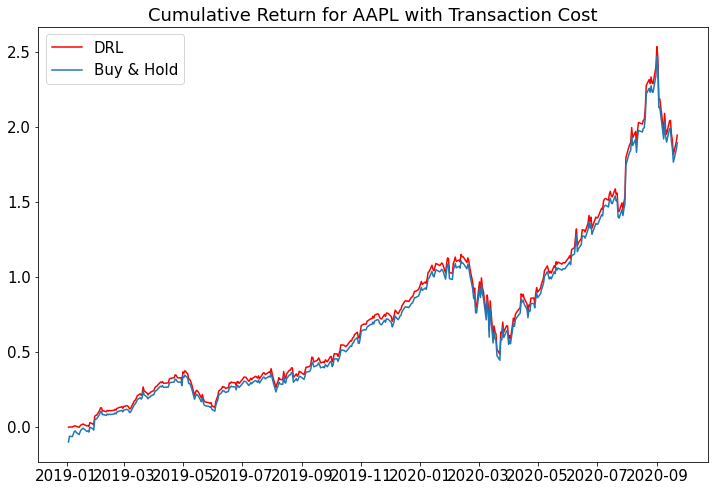

In [96]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(test.datadate, DRL_cumulative_return, color='red',label = "DRL")
plt.plot(test.datadate, buy_and_hold_cumulative_return, label = "Buy & Hold")
plt.title("Cumulative Return for AAPL with Transaction Cost",size= 18)
plt.legend()
plt.rc('legend',fontsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)